## Ising model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 5
J = 100
k = 1.0
mesh_x, mesh_y = 50, 50
spin = -np.ones((mesh_x, mesh_y))
#Here the value of spin tells us about the atom, whether it is A or B
#Initially we have everything as A
num_ensembles = 200000
save_every = 10000 # for animation
average_spin = np.zeros(num_ensembles)

### $\Delta E$ calculation
The energy of the system is,
$$ E = -\frac{J}{2} \sum_{i}^{N} \sum_{j}^{Z} s_i s_j $$
Here $J$ is analogous to $\Omega$, which is a representative of bond energies between A-B in comparison with A-A and B-B.

On flipping the spin at $k$ from $s_k$ to $-s_k$, (i.e, changing an atom from A to B), also to maintain the composition, at some other $l$, the value should change from $s_l$ to $-s_l$, the change in energy can be computed as,
$$ \Delta E = 2Js_k \sum_{i}^{Z} s_i + 2Js_l \sum_{i}^{Z} s_i $$

In [3]:
def calculate_deltaE(x, y, k ,l):
    # assuming periodic boundaries
    spin_L = spin[ (x-1)%mesh_x, y ] # left spin
    spin_R = spin[ (x+1)%mesh_x, y ] # right spin
    spin_U = spin[ x, (y+1)%mesh_y ] # up spin
    spin_D = spin[ x, (y-1)%mesh_y ] # down spin
    
    spin_L1 = spin[ (k-1)%mesh_x, l ]
    spin_R1 = spin[ (k+1)%mesh_x, l ]
    spin_U1 = spin[ k, (l+1)%mesh_y ]
    spin_D1 = spin[ k, (l-1)%mesh_y ]
    
    deltaE = 2*J*spin[x, y]*(spin_L + spin_R + spin_U + spin_D) + 2*J*spin[k, l]*(spin_L1 + spin_R1 + spin_U1 + spin_D1)
    return deltaE

### Initialisation

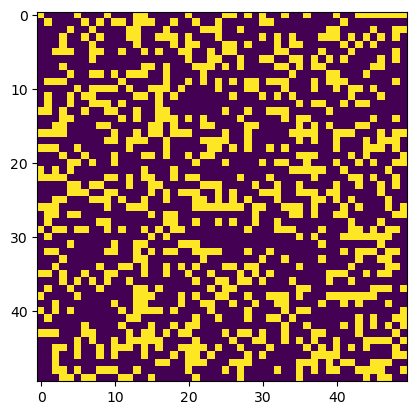

In [4]:
#Initialising the domain by changing some of the A's to B's
#j_arr and k_arr are used to keep track of the locations of B
#In a total of 2500 (50x50) cells, we are introducing 1000 B atoms
j_arr = np.zeros(1000)
k_arr = np.zeros(1000)
for i in range(1000):
    j=np.random.randint(mesh_x)
    k=np.random.randint(mesh_x)
    j_arr[i] = j
    k_arr[i] = k
    spin[j,k] = 1
plt.imshow(spin)

### Metropolis

In [5]:
ims = [] # python list (similiar to numpy array) required for saving images to create videos
fig = plt.figure() # creates figure window to display animation
for i in range(num_ensembles):
    j1 = np.random.randint(1000)
    #spin[j_arr[j],k_arr[j]]=-1
    j = np.random.randint(mesh_x)
    k = np.random.randint(mesh_x)
    while spin[j,k]==1:
        j = np.random.randint(mesh_x)
        k = np.random.randint(mesh_x)
    x = int(j_arr[j1])
    y = int(k_arr[j1])
    deltaE = calculate_deltaE(x,y, j , k)
    if deltaE < 0.0: # flip the spin
        spin[x, y] = -spin[x,y]
        spin[j,k] = - spin[j,k]
        j_arr[j1] = j
        k_arr[j1] = k
    else: # flip the spin with a probability
        rv = np.random.random()
        if rv < np.exp( -deltaE/(k*T) ):
            spin[x,y] = -spin[x,y]
            spin[j,k] = - spin[j,k]
            j_arr[j1] = j
            k_arr[j1] = k
        #else:
         #   spin[x, y] = spin[x, y] # keep the previous spin (reject the flip)
    #average_spin[i] = np.average(spin)
    if i%save_every == 0:
        ### to create animation
        im = plt.imshow(spin)
        ims.append([im]) # adding image to array storing all images
# to create animation       
import matplotlib.animation as animation
from IPython.display import HTML
anim = animation.ArtistAnimation(fig, ims, interval=1000, blit=True, repeat_delay=2000)
plt.close(anim._fig)
HTML(anim.to_html5_video())
# anim.save('spin.mp4', codec='h264') # to save video as mp4

C:\Users\DELL\AppData\Local\Temp\ipykernel_28648\3228461734.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  if rv < np.exp( -deltaE/(k*T) ):
C:\Users\DELL\AppData\Local\Temp\ipykernel_28648\3228461734.py:21: RuntimeWarning: invalid value encountered in scalar divide
  if rv < np.exp( -deltaE/(k*T) ):


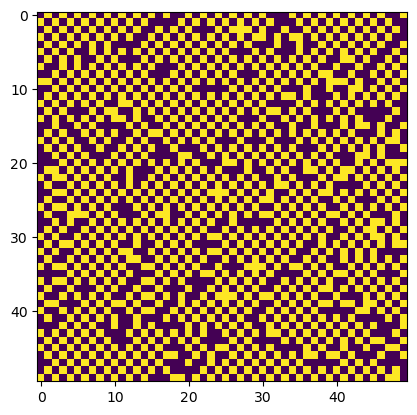

In [6]:
plt.imshow(spin)